In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
results = pd.read_csv('userstudy.csv')

## Study 1

### Likert scale analysis

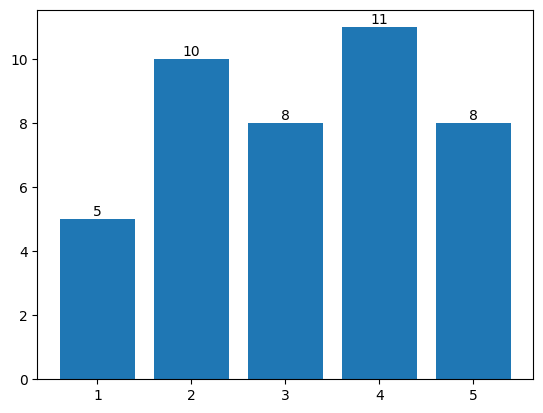

In [43]:
# original name meaningfulness in relation to code cell
og_name_code_cell_column_names = [
    "get_name is meaningful in relation to its usage in the code cell.",
    "dataframe is meaningful in relation to its usage in the code cell.",
    "get_datetime is meaningful in relation to its usage in the code cell.",
    "df is meaningful in relation to its usage in the code cell.",
    "lane_detection is meaningful in relation to its usage in the code cell.",
    "image is meaningful in relation to its usage in the code cell."
]

# put results of all columns into one list
og_name_code_cell = []
for col in og_name_code_cell_column_names:
    og_name_code_cell.append(results[col].tolist())

# flatten list
og_name_code_cell = [item for sublist in og_name_code_cell for item in sublist]

# plot bar chart of og_name_code_cell
# count occurrences of each value
unique, counts = np.unique(og_name_code_cell, return_counts=True)
plt.bar(unique, counts)

# create df with columns [1,2,3,4,5] and row 'og_name_code_cell' with counts
study1_likert_df  = pd.DataFrame(columns=[1,2,3,4,5])
study1_likert_df.loc['og_name_code_cell'] = counts

# add counts
for i in range(len(counts)):
    plt.text(unique[i], counts[i] + 0.1, str(counts[i]), ha='center', color='black')

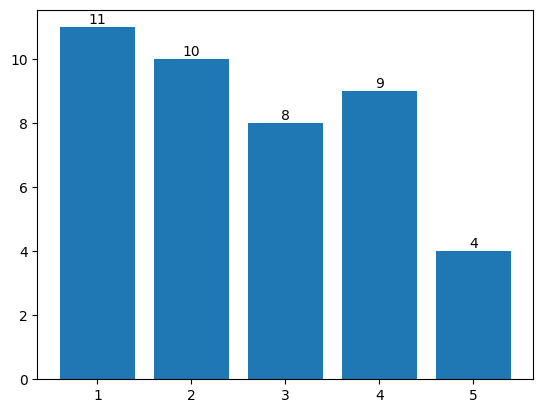

In [44]:
# original name meaningfulness in relation to project purpose
og_name_project_purpose_column_names = [
    "get_name is meaningful in relation to the project's purpose.",
    "dataframe is meaningful in relation to the project's purpose.",
    "get_datetime is meaningful in relation to the project's purpose.",
    "df is meaningful in relation to the project's purpose.",
    "lane_detection is meaningful in relation to the project's purpose.",
    "image is meaningful in relation to the project's purpose."
]

# put results of all columns into one list
og_name_project_purpose = []
for col in og_name_project_purpose_column_names:
    og_name_project_purpose.append(results[col].tolist())

# flatten list
og_name_project_purpose = [item for sublist in og_name_project_purpose for item in sublist]

# plot bar chart of og_name_project_purpose
# count occurrences of each value
unique, counts = np.unique(og_name_project_purpose, return_counts=True)
plt.bar(unique, counts)
# add counts
for i in range(len(counts)):
    plt.text(unique[i], counts[i] + 0.1, str(counts[i]), ha='center', color='black')

# add to df
study1_likert_df.loc['og_name_project_purpose'] = counts

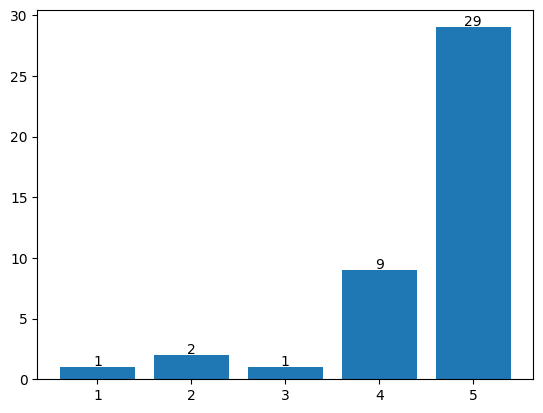

In [45]:
# GPT name meaningfulness in relation to code cell
gpt_name_code_cell_column_names = [
    "get_airport_name is meaningful in relation to its usage in the code cell.",
    "booking_data is meaningful in relation to its usage in the code cell.",
    "parse_date is meaningful in relation to its usage in the code cell.",
    "hotel_counts is meaningful in relation to its usage in the code cell.",
    "detect_lane_lines is meaningful in relation to its usage in the code cell.",
    "lane_image is meaningful in relation to its usage in the code cell."
]

# put results of all columns into one list
gpt_name_code_cell = []
for col in gpt_name_code_cell_column_names:
    gpt_name_code_cell.append(results[col].tolist())

# flatten list
gpt_name_code_cell = [item for sublist in gpt_name_code_cell for item in sublist]

# plot bar chart of gpt_name_code_cell
# count occurrences of each value
unique, counts = np.unique(gpt_name_code_cell, return_counts=True)
plt.bar(unique, counts)

# add counts
for i in range(len(counts)):
    plt.text(unique[i], counts[i] + 0.1, str(counts[i]), ha='center', color='black')

# add to df
study1_likert_df.loc['gpt_name_code_cell'] = counts

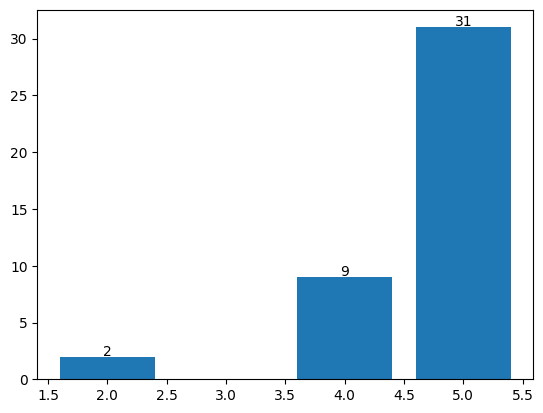

In [46]:
# GPT name meaningfulness in relation to project purpose
gpt_name_project_purpose_column_names = [
    "get_airport_name is meaningful in relation to the project's purpose.",
    "booking_data is meaningful in relation to the project's purpose.",
    "parse_date is meaningful in relation to the project's purpose.",
    "hotel_counts is meaningful in relation to the project's purpose.",
    "detect_lane_lines is meaningful in relation to the project's purpose.",
    "lane_image is meaningful in relation to the project's purpose."
]

# put results of all columns into one list
gpt_name_project_purpose = []
for col in gpt_name_project_purpose_column_names:
    gpt_name_project_purpose.append(results[col].tolist())

# flatten list
gpt_name_project_purpose = [item for sublist in gpt_name_project_purpose for item in sublist]

# plot bar chart of gpt_name_project_purpose
# count occurrences of each value
unique, counts = np.unique(gpt_name_project_purpose, return_counts=True)
plt.bar(unique, counts)
# add counts
for i in range(len(counts)):
    plt.text(unique[i], counts[i] + 0.1, str(counts[i]), ha='center', color='black')

# add to df
counts_new = [0, 0, 0, 0, 0]
for i in range(len(unique)):
    counts_new[unique[i]-1] = counts_new[unique[i]-1] + counts[i]

study1_likert_df.loc['gpt_name_project_purpose'] = counts_new

In [47]:
# add average as column calculated as #1 * 1 + #2 * 2 + #3 * 3 + #4 * 4 + #5 * 5 / sum of all
study1_likert_df['average'] = study1_likert_df[1] * 1 + study1_likert_df[2] * 2 + study1_likert_df[3] * 3 + study1_likert_df[4] * 4 + study1_likert_df[5] * 5
# divide each average by sum of all values in that row (except average)
study1_likert_df['average'] = study1_likert_df['average'] / (study1_likert_df[1] + study1_likert_df[2] + study1_likert_df[3] + study1_likert_df[4] + study1_likert_df[5])
# round to 2 decimals
study1_likert_df['average'] = study1_likert_df['average'].round(2)
study1_likert_df

,1,2,3,4,5,average
og_name_code_cell,5,10,8,11,8,3.17
og_name_project_purpose,11,10,8,9,4,2.64
gpt_name_code_cell,1,2,1,9,29,4.50
gpt_name_project_purpose,0,2,0,9,31,4.64


In [48]:
# drop average
study1_likert_df_percentage = study1_likert_df.drop(columns=['average'])

# get percentage study1_likert_df
study1_likert_df_percentage = study1_likert_df_percentage.div(study1_likert_df_percentage.sum(axis=1), axis=0)

# multiply by 100 and round to 2 decimals
study1_likert_df_percentage = study1_likert_df_percentage.mul(100).round(2)

study1_likert_df_percentage

,1,2,3,4,5
og_name_code_cell,11.90,23.81,19.05,26.19,19.05
og_name_project_purpose,26.19,23.81,19.05,21.43,9.52
gpt_name_code_cell,2.38,4.76,2.38,21.43,69.05
gpt_name_project_purpose,0.00,4.76,0.00,21.43,73.81


<Axes: >

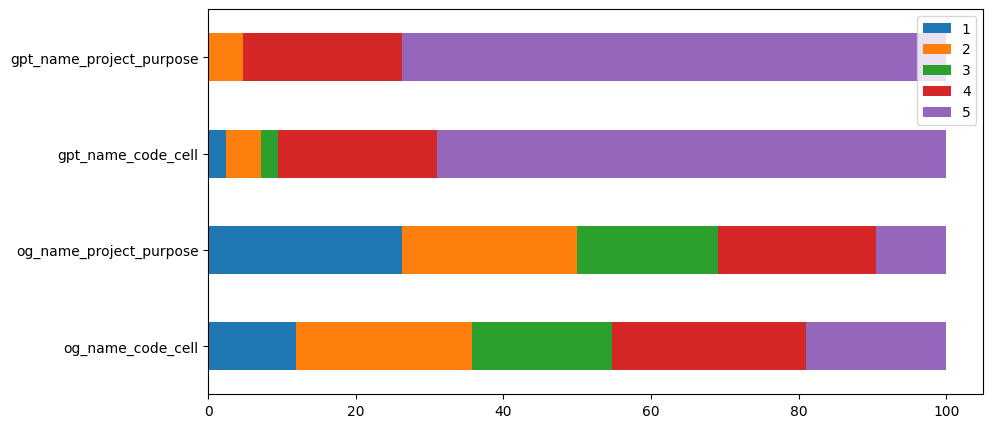

In [49]:
# plot study1_likert_df as a 100% stacked bar chart horizontally
study1_likert_df_percentage.plot(kind='barh', stacked=True, figsize=(10, 5))

In [50]:
og_name_code_cell_over_gpt_name_code_cell = 0
og_name_project_purpose_over_gpt_name_project_purpose = 0

# analyze if GPT name was reported as more meaningful than original name in relation to code cell
for i in range(len(og_name_code_cell)):
      if og_name_code_cell[i] > gpt_name_code_cell[i]:
            og_name_code_cell_over_gpt_name_code_cell += 1

# analyze if GPT name was reported as more meaningful than original name in relation to project purpose

for i in range(len(og_name_project_purpose)):
      if og_name_project_purpose[i] > gpt_name_project_purpose[i]:
            og_name_project_purpose_over_gpt_name_project_purpose += 1

study_1_likert_pref = "Code purpose\n"
study_1_likert_pref += "\tOG more meaningful score: " + str(og_name_code_cell_over_gpt_name_code_cell) + ", Percentage: " + str(round(100 * og_name_code_cell_over_gpt_name_code_cell / len(og_name_code_cell), 2)) + "\n"
study_1_likert_pref += "\tGPT more meaningful score: " + str(len(og_name_code_cell) - og_name_code_cell_over_gpt_name_code_cell) + ", Percentage: " + str((round(100 * (len(og_name_code_cell) - og_name_code_cell_over_gpt_name_code_cell) / len(og_name_code_cell), 2))) + "\n"
study_1_likert_pref += "Project purpose\n"
study_1_likert_pref += "\tOG more meaningful score: " + str(og_name_project_purpose_over_gpt_name_project_purpose) + ", Percentage: " + str(round(100 * og_name_project_purpose_over_gpt_name_project_purpose / len(og_name_project_purpose), 2)) + "\n"
study_1_likert_pref += "\tGPT more meaningful score: " + str(len(og_name_project_purpose) - og_name_project_purpose_over_gpt_name_project_purpose) + ", Percentage: " + str((round(100 * (len(og_name_project_purpose) - og_name_project_purpose_over_gpt_name_project_purpose) / len(og_name_project_purpose), 2))) + "\n"

print(study_1_likert_pref)


Code purpose
	OG more meaningful score: 4, Percentage: 9.52
	GPT more meaningful score: 38, Percentage: 90.48
Project purpose
	OG more meaningful score: 2, Percentage: 4.76
	GPT more meaningful score: 40, Percentage: 95.24



### Which name preference

Preference
	Both: 16.67%
	Neither: 2.38%
	gpt: 73.81%
	og: 7.14%



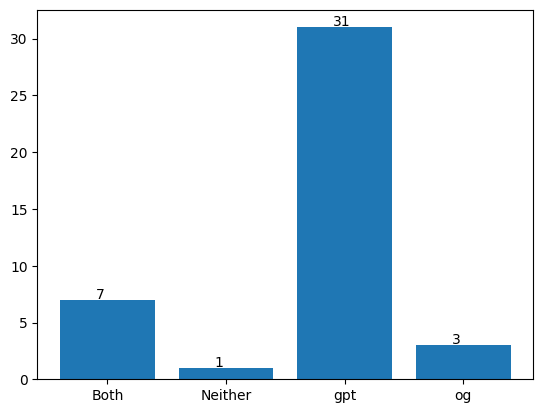

In [51]:
original_names = [
    "get_name",
    "dataframe",
    "get_datetime",
    "df",
    "lane_detection",
    "image"
]

gpt_names = [
    "get_airport_name",
    "booking_data",
    "parse_date",
    "hotel_counts",
    "detect_lane_lines",
    "lane_image"
]

# collect all rows starting with "Which name do you prefer?"
preference_rows = []
for col in results.columns:
    if col.startswith("Which name do you prefer?"):
        preference_rows.append(results[col].tolist())

# flatten list
preference_rows = [item for sublist in preference_rows for item in sublist]

# replace all values in original_names with "og" and all values in gpt_names with "gpt" in preference_rows
for i in range(len(preference_rows)):
    if preference_rows[i] in original_names:
        preference_rows[i] = "og"
    elif preference_rows[i] in gpt_names:
        preference_rows[i] = "gpt"

# count occurrences of each value
unique, counts = np.unique(preference_rows, return_counts=True)

# store output in a string variable
preference_output = "Preference\n"
preference_output += "\tBoth: " + str(round(100 * counts[0] / len(preference_rows), 2)) + "%\n"
preference_output += "\tNeither: " + str(round(100 * counts[1] / len(preference_rows), 2)) + "%\n"
preference_output += "\tgpt: " + str(round(100 * counts[2] / len(preference_rows), 2)) + "%\n"
preference_output += "\tog: " + str(round(100 * counts[3] / len(preference_rows), 2)) + "%\n"

# plot bar chart of preference_rows
plt.bar(unique, counts)
# add counts to plot
for i in range(len(counts)):
    plt.text(x=i - 0.1, y=counts[i] + 0.1, s=counts[i], size=10)

# print percentages
print(preference_output)

In [52]:
# collect all text from "Which name do you prefer?" columns
preference_text = []
for col in results.columns:
    if col.startswith("Why do you prefer that name, or why do you prefer both/neither?"):
        preference_text.append(results[col].tolist())

# add participant number to each text
for i in range(len(preference_text)):
    for j in range(len(preference_text[i])):
        preference_text[i][j] = "User " + str(j + 1) + ": " + str(preference_text[i][j])

# flatten list
preference_text = [item for sublist in preference_text for item in sublist]

# organize text into lists of Both, Neither, gpt, og
both = []
neither = []
gpt = []
og = []

for i in range(len(preference_rows)):
    if preference_rows[i] == "Both":
        both.append(preference_text[i])
    elif preference_rows[i] == "Neither":
        neither.append(preference_text[i])
    elif preference_rows[i] == "gpt":
        gpt.append(preference_text[i])
    elif preference_rows[i] == "og":
        og.append(preference_text[i])

# print all text from "Which name do you prefer?" columns
print("Both")
for i in range(len(both)):
    print("\t" + str(i + 1) + ". " + str(both[i]))

print("Neither")
for i in range(len(neither)):
    print("\t" + str(i + 1) + ". " + str(neither[i]))

print("gpt")
for i in range(len(gpt)):
    print("\t" + str(i + 1) + ". " + str(gpt[i]))

print("og")
for i in range(len(og)):
    print("\t" + str(i + 1) + ". " + str(og[i]))


Both
	1. User 3: if there is only one dataframe in the whole notebook, it's ok to name it "dataframe"
	2. User 4: Depends on the context of the usage, if this is the main dataframe used it is sufficient to name it this as its the only set of data you are looking at, but booking data is more descriptive in the situation that there are multiple sources to analyse..
	3. User 1: I like both
	4. User 6: The name indicates what the function do clearly
	5. User 1: nan
	6. User 3: image if the variable is only used in the the code cell, lane_image otherwise
	7. User 4: I feel as though these are interchangeable, as they both get across the point of what the variable is storing. While lane image is more descriptive, I think both are sufficient as a name.
Neither
	1. User 5: "df" is short for "dataframe", which is non-descriptive. "hotel_counts" is descriptive but seems wrong to me (gives misleading information about the data content)
gpt
	1. User 1: It is more meaningful
	2. User 2: get_name is

## Study 2

### Likert scales for content

In [53]:
intro_questions = [
    "## Background accurately summarizes the background and wider topic of the project.",
    "## Goals accurately summarizes the goals or purpose of the project.",
    "## Structure accurately summarizes the structure of the notebook.",
]

# put results of all columns into one list
background_goals_structure = []
for col in intro_questions:
    background_goals_structure.append(results[col].tolist())

# for each question, count how many times the values 1, 2, 3, 4, 5 occur
vals = [1, 2, 3, 4, 5]
counts_questions = []
for i in range(len(background_goals_structure)):
    counts_questions.append([background_goals_structure[i].count(val) for val in vals])

# create df
markdown_df = pd.DataFrame(counts_questions, columns=vals, index=intro_questions)

In [54]:
code_explanation_questions = [
    "## Explanation is accurate in describing what the code itself is doing.",
    "## Reasoning is accurate in describing why a task is performed in the context of the project's purpose.",
    "## Output is accurate in describing the meaning of outputs/results and interpreting its meaning.",
]

# put results of all columns into one list
explanation_reasoning_output = []
for col in code_explanation_questions:
    explanation_reasoning_output.append(results[col].tolist())

# for each question, count how many times the values 1, 2, 3, 4, 5 occur
counts_questions = []
for i in range(len(explanation_reasoning_output)):
    counts_questions.append([explanation_reasoning_output[i].count(val) for val in vals])

# add to df
markdown_df = pd.concat([markdown_df, pd.DataFrame(counts_questions, columns=vals, index=code_explanation_questions)])

In [55]:
conclusion_questions = [
    "## Summary accurately summarizes what was done in the notebook.",
    "## Interpretation accurately summarizes any key results, findings, or outputs in the notebook and links these to the project’s purpose.",   
]

# put results of all columns into one list
summary_interpretation = []
for col in conclusion_questions:
    summary_interpretation.append(results[col].tolist())

# for each question, count how many times the values 1, 2, 3, 4, 5 occur
counts_questions = []
for i in range(len(summary_interpretation)):
    counts_questions.append([summary_interpretation[i].count(val) for val in vals])

# add to df
markdown_df = pd.concat([markdown_df, pd.DataFrame(counts_questions, columns=vals, index=conclusion_questions)])

# convert names of rows to first word
markdown_df.index = [x.split()[1] for x in markdown_df.index]
markdown_df

,1,2,3,4,5
Background,0,0,0,2,5
Goals,0,0,0,1,6
Structure,0,0,1,2,4
Explanation,0,0,1,3,3
Reasoning,0,1,1,3,2
Output,0,1,0,2,4
Summary,0,0,2,1,4
Interpretation,0,1,1,4,1


In [56]:
# add average as column calculated as #1 * 1 + #2 * 2 + #3 * 3 + #4 * 4 + #5 * 5 / sum of all
markdown_df['average'] = markdown_df[1] * 1 + markdown_df[2] * 2 + markdown_df[3] * 3 + markdown_df[4] * 4 + markdown_df[5] * 5
# divide each average by sum of all values in that row (except average)
markdown_df['average'] = markdown_df['average'] / (markdown_df[1] + markdown_df[2] + markdown_df[3] + markdown_df[4] + markdown_df[5])
# round to 2 decimals
markdown_df['average'] = markdown_df['average'].round(2)
markdown_df

,1,2,3,4,5,average
Background,0,0,0,2,5,4.71
Goals,0,0,0,1,6,4.86
Structure,0,0,1,2,4,4.43
Explanation,0,0,1,3,3,4.29
Reasoning,0,1,1,3,2,3.86
Output,0,1,0,2,4,4.29
Summary,0,0,2,1,4,4.29
Interpretation,0,1,1,4,1,3.71


In [57]:
# create a new dataframe to store the sums
markdown_df_new = pd.DataFrame(columns=[1, 2, 3, 4, 5], index=['Introduction', 'Code Explanation', 'Conclusion'])

# sum first 3 rows together and add to new_df
markdown_df_new.loc['Introduction'] = markdown_df.iloc[0:3].sum()

# sum next 3 rows together and add to new_df
markdown_df_new.loc['Code Explanation'] = markdown_df.iloc[3:6].sum()

# sum last 2 rows together and add to new_df
markdown_df_new.loc['Conclusion'] = markdown_df.iloc[6:8].sum()

# add average as column calculated as #1 * 1 + #2 * 2 + #3 * 3 + #4 * 4 + #5 * 5 / sum of all
markdown_df_new['average'] = markdown_df_new[1] * 1 + markdown_df_new[2] * 2 + markdown_df_new[3] * 3 + markdown_df_new[4] * 4 + markdown_df_new[5] * 5
# divide each average by sum of all values in that row (except average)
markdown_df_new['average'] = markdown_df_new.apply(lambda row: row['average'] / (row[1] + row[2] + row[3] + row[4] + row[5]), axis=1)
# round to 2 decimals
markdown_df_new = markdown_df_new.applymap(lambda x: round(x, 2))
markdown_df_new

,1,2,3,4,5,average
Introduction,0.0,0.0,1.0,5.0,15.0,4.67
Code Explanation,0.0,2.0,2.0,8.0,9.0,4.14
Conclusion,0.0,1.0,3.0,5.0,5.0,4.00


### Likert scales for usefulness

In [58]:
useful_questions = [
    "The introduction is useful in aiding my understanding of the project/notebook overall.",
    "The generated text is useful in aiding my understanding of the code cell overall.",
    "The conclusion is useful in aiding my understanding of the project/notebook overall."
]

# put results of all columns into one list
useful = []
for col in useful_questions:
    useful.append(results[col].tolist())

# for each question, count how many times the values 1, 2, 3, 4, 5 occur
vals = [1, 2, 3, 4, 5]
counts_questions = []
for i in range(len(useful)):
    counts_questions.append([useful[i].count(val) for val in vals])

# create df
useful_df = pd.DataFrame(counts_questions, columns=vals, index=useful_questions)

# rename rows to ["introduction", "code cell", "conclusion"]
useful_df.index = ["introduction", "code cell", "conclusion"]

# add average as column calculated as #1 * 1 + #2 * 2 + #3 * 3 + #4 * 4 + #5 * 5 / sum of all
useful_df['average'] = useful_df[1] * 1 + useful_df[2] * 2 + useful_df[3] * 3 + useful_df[4] * 4 + useful_df[5] * 5
# divide each average by sum of all values in that row (except average)
useful_df['average'] = useful_df['average'] / (useful_df[1] + useful_df[2] + useful_df[3] + useful_df[4] + useful_df[5])
# round to 2 decimals
useful_df['average'] = useful_df['average'].round(2)

useful_df

,1,2,3,4,5,average
introduction,0,0,0,3,4,4.57
code cell,0,0,1,2,4,4.43
conclusion,0,0,1,4,2,4.14


In [59]:
useful_percentage = useful_df.div(useful_df.sum(axis=1), axis=0)
useful_percentage = useful_percentage.mul(100).round(2)
useful_percentage

,1,2,3,4,5,average
introduction,0.0,0.0,0.00,25.93,34.57,39.50
code cell,0.0,0.0,8.75,17.50,35.00,38.76
conclusion,0.0,0.0,8.98,35.91,17.95,37.16


### Text responses for each section

In [60]:
# print text

# text in "Why did/didn't you find the introduction useful in aiding your understanding of the project/notebook overall?"
print("intro")
for i, text in enumerate(results["Why did/didn't you find the introduction useful in aiding your understanding of the project/notebook overall?"].tolist()):
    print(f"User {i+1}:", text)
print()

# text in "Why did/didn't you find the code explanation useful in aiding your understanding of the code cell overall?"
print("code explanation")
for i, text in enumerate(results["Why did/didn't you find the code explanation useful in aiding your understanding of the code cell overall?"].tolist()):
    print(f"User {i+1}:", text)
print()

# text in "Why did/didn't you find the conclusion useful in aiding your understanding of the project/notebook overall?"
print("conclusion")
for i, text in enumerate(results["Why did/didn't you find the conclusion useful in aiding your understanding of the project/notebook overall?"].tolist()):
    print(f"User {i+1}:", text)
print()

intro
User 1: the structure had a few technical terms that I did not understand e.g Jaccard index
User 2: Explains everything clearly
User 3: Good information, could be shorter considering the length of the notebook
User 4: It's generally quite good, but could be a bit more in-depth and provide more value to the reader of what is happening. The outline of the project is very brief.
User 5: The generated introduction gives exactly the same summary of the notebook that I would write after reading the notebook myself.
User 6: Use general language, easy to understand and still have detailed on the data structures
User 7: The introduction helps me understand what the project is about.

code explanation
User 1: The explanation was clear and providing an output is really useful
User 2: It was useful
User 3: Too wordy, non necessary information (e.g. listing all the parameters), wrong information (confusion matrix values),
User 4: Explanations are very surface level, could be a lot more in dep

## Tables I like

### Study 1

In [61]:
study1_likert_df

,1,2,3,4,5,average
og_name_code_cell,5,10,8,11,8,3.17
og_name_project_purpose,11,10,8,9,4,2.64
gpt_name_code_cell,1,2,1,9,29,4.50
gpt_name_project_purpose,0,2,0,9,31,4.64


In [62]:
study1_likert_df_percentage

,1,2,3,4,5
og_name_code_cell,11.90,23.81,19.05,26.19,19.05
og_name_project_purpose,26.19,23.81,19.05,21.43,9.52
gpt_name_code_cell,2.38,4.76,2.38,21.43,69.05
gpt_name_project_purpose,0.00,4.76,0.00,21.43,73.81


In [63]:
print(study_1_likert_pref)

Code purpose
	OG more meaningful score: 4, Percentage: 9.52
	GPT more meaningful score: 38, Percentage: 90.48
Project purpose
	OG more meaningful score: 2, Percentage: 4.76
	GPT more meaningful score: 40, Percentage: 95.24



In [64]:
print(preference_output)

Preference
	Both: 16.67%
	Neither: 2.38%
	gpt: 73.81%
	og: 7.14%



### Study 2

In [65]:
markdown_df

,1,2,3,4,5,average
Background,0,0,0,2,5,4.71
Goals,0,0,0,1,6,4.86
Structure,0,0,1,2,4,4.43
Explanation,0,0,1,3,3,4.29
Reasoning,0,1,1,3,2,3.86
Output,0,1,0,2,4,4.29
Summary,0,0,2,1,4,4.29
Interpretation,0,1,1,4,1,3.71


In [66]:
markdown_df_new

,1,2,3,4,5,average
Introduction,0.0,0.0,1.0,5.0,15.0,4.67
Code Explanation,0.0,2.0,2.0,8.0,9.0,4.14
Conclusion,0.0,1.0,3.0,5.0,5.0,4.00


In [67]:
useful_df

,1,2,3,4,5,average
introduction,0,0,0,3,4,4.57
code cell,0,0,1,2,4,4.43
conclusion,0,0,1,4,2,4.14


In [68]:
markdown_df_percentage = markdown_df.drop(columns=['average'])
markdown_df_percentage = markdown_df_percentage.div(markdown_df_percentage.sum(axis=1), axis=0)
markdown_df_percentage = markdown_df_percentage.mul(100).round(2)
# add \% to each value
for i in range(len(markdown_df_percentage)):
    for j in range(len(markdown_df_percentage.columns)):
        markdown_df_percentage.iloc[i, j] = str(markdown_df_percentage.iloc[i, j]) + "\%"
markdown_df_percentage

,1,2,3,4,5
Background,0.0\%,0.0\%,0.0\%,28.57\%,71.43\%
Goals,0.0\%,0.0\%,0.0\%,14.29\%,85.71\%
Structure,0.0\%,0.0\%,14.29\%,28.57\%,57.14\%
Explanation,0.0\%,0.0\%,14.29\%,42.86\%,42.86\%
Reasoning,0.0\%,14.29\%,14.29\%,42.86\%,28.57\%
Output,0.0\%,14.29\%,0.0\%,28.57\%,57.14\%
Summary,0.0\%,0.0\%,28.57\%,14.29\%,57.14\%
Interpretation,0.0\%,14.29\%,14.29\%,57.14\%,14.29\%
